# **COUPLED OSCILLATORS** #
### *Marlon A. Gutiérrez E.* ###

El presente código tiene como objetivo la determinación del movimiento de dos osciladores de masa *m* y conectados mediante resortes de constantes *k1*, *k2* y *k3*; tal como lo muestra la Figura 1.

![coupled_oscillators](coupled_oscillators.png "coupled_oscillators")

**Figura 1.** Osciladores acoplados.

## **REQUERIMIENTOS:** ##

* Librerías instaladas: Numpy, Matplotlib y Scipy.

## **Importación de módulos** ##

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg

## **Definición de variables y valores iniciales** ##

Definición de constantes elásticas *k* y masa *m* de los osciladores. Según las posiciones iniciales de los osciladores, se presentan tres modos de oscilación determinados.

In [22]:
# Definición de variables: ki := constantes elásticas de resortes, m := masa de osciladores. 

k1 = 10
k2 = 1
k3 = 5

m = 15

# Definición de posiciones iniciales y dominio.
# Valores iniciales de amplitud x1_0 y x2_0 para osciladores 1 y 2, respectivamente.
# xi_0[0] := modo 1 (simétrico), xi_0[1] := modo 2 (antisimétrico) y xi_0[2] := modo 3 (i = 1, 2).

a = 1

x1_0 = [a, a, a]
x2_0 = [a, -a, 0]

t = np.linspace(0, 60, 1000)

## **Determinación de matriz** ##

Después de un análisis de fuerzas con las leyes de Newton o de enrgía con Lagrange, se obtienen las siguientes ecuaciones:

\begin{equation}
m \frac{ \mathrm{d}^2 x_1 }{\mathrm{d}t^2} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}

\begin{equation}
m \frac{ \mathrm{d}^2 x_2 }{\mathrm{d}t^2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

Estas ecuaciones se representan en forma matricial:

\begin{equation}
m
\begin{pmatrix} 
\ddot{x_1}  \\
\ddot{x_2}    
\end{pmatrix}
=-
\begin{pmatrix} 
k_1 + k_2 & -k_2  \\
-k_2       &  k_2+k_3  \\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
\end{equation}

In [23]:
# Definición de la matriz A a partir de las ecuaciones generadas por análisis de fuerzas.

A = np.array([[k1+k2, -k2], [-k2, k2+k3]])

## **Determinación de valores y vectores propios** ##

In [24]:
# Determinación de valores y vectores propios de la matriz A.

λ, V = np.linalg.eig(A)

In [25]:
# Matriz diagonal de valores propios de A.

np.diag(λ)

array([[11.1925824,  0.       ],
       [ 0.       ,  5.8074176]])

In [26]:
# Matriz de vectores propios.

V

array([[ 0.98195639,  0.18910752],
       [-0.18910752,  0.98195639]])

## **Determinación de frecuencias *ω*** ##

A partir de la ecuación $\lambda=m\omega^2$ donde *λ* es la matriz de valores propios, se obtiene *ω* para cada oscilador.

In [27]:
# Determinación de frecuencias de oscilación ω1 y ω2 para osciladores 1 y 2, respectivamente.

ω1 = (λ[0]/m)**0.5
ω2 = (λ[1]/m)**0.5

ω1, ω2

(0.863812572400875, 0.622222768062626)

## **Ecuaciones desacopladas** ##

Para resolver la matriz *A*, se realiza una transformación que permite desacoplar las ecuaciones como:

\begin{equation}
\ddot{\eta_1}+\omega_1\eta_1=0
\end{equation}

\begin{equation}
\ddot{\eta_2}+\omega_2\eta_2=0
\end{equation}

Los valores iniciales para resolver estas ecuaciones cambian. Se obtienen a partir de:

\begin{equation}
\eta_1=\frac{1}{\sqrt{2}}(x_1-x_2)
\end{equation}

\begin{equation}
\eta_2=\frac{1}{\sqrt{2}}(x_1+x_2)
\end{equation}


## **Solución de ecuaciones desacopladas** ##

In [28]:
# Definición de funciones para resolver ecuaciones desacopladas.

def η1(H1, t):
    return [H1[1], -ω1**2 * H1[0]]

def η2(H2, t):
    return [H2[1], -ω2**2 * H2[0]]

In [29]:
# Definición de valores iniciales para las ecuaciones desacopladas.

η1_0 = []
η2_0 = []

for i in range(len(x1_0)):
    η1_0.append([2**-0.5 * (x1_0[i] - x2_0[i]), 0])
    η2_0.append([2**-0.5 * (x1_0[i] + x2_0[i]), 0])
print(η1_0)
print(η2_0)

[[0.0, 0], [1.4142135623730951, 0], [0.7071067811865476, 0]]
[[1.4142135623730951, 0], [0.0, 0], [0.7071067811865476, 0]]


In [30]:
# Solución de ecuaciones desacopladas.

η1_s = []
η2_s = []

for i in range(len(η1_0)):
    η1_s.append(integrate.odeint(η1, η1_0[i], t))
    η2_s.append(integrate.odeint(η2, η2_0[i], t))

## **Gráficas de *η* en los tres modos** ##

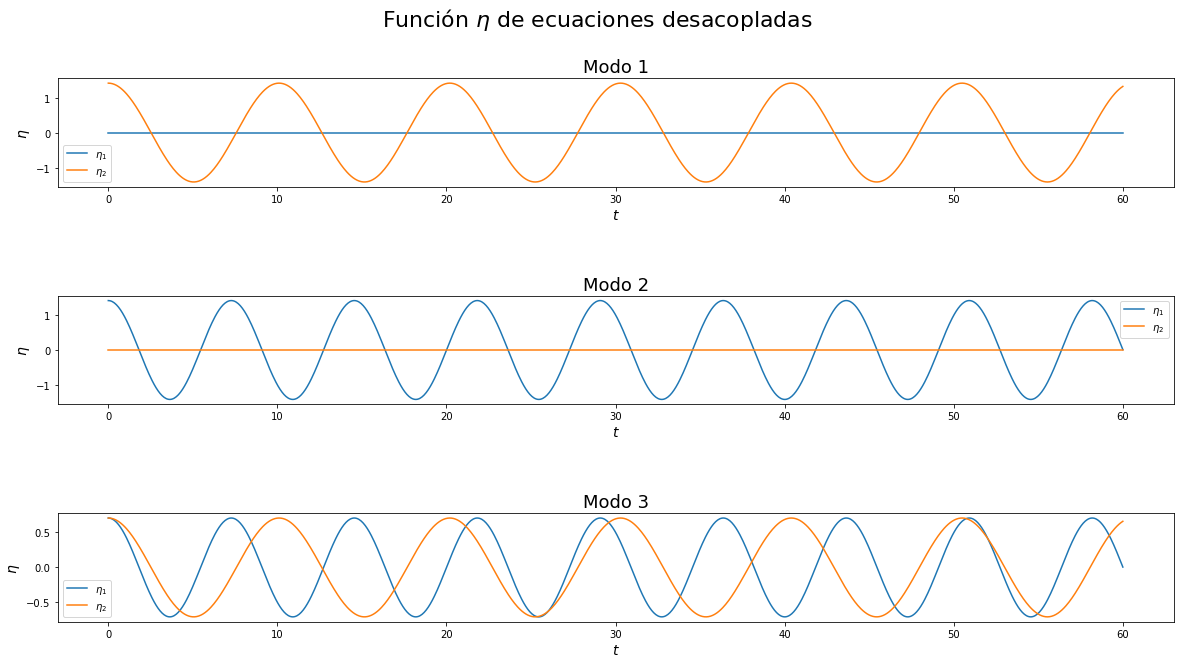

In [31]:
# Gráficas de las soluciones de ecuaciones desacopladas para cada modo.

plt.figure(figsize=(20, 10))
plt.suptitle('Función $η$ de ecuaciones desacopladas', size=22)
plt.subplots_adjust(hspace=1)

# Modo 1
plt.subplot(311)
plt.plot(t, η1_s[0][:, 0], label='$η_{1}$')
plt.plot(t, η2_s[0][:, 0], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 1', size=18)
plt.legend()

# Modo 2
plt.subplot(312)
plt.plot(t, η1_s[1][:, 0], label='$η_{1}$')
plt.plot(t, η2_s[1][:, 0], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 2', size=18)
plt.legend()

# Modo 3
plt.subplot(313)
plt.plot(t, η1_s[2][:, 0], label='$η_{1}$')
plt.plot(t, η2_s[2][:, 0], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 3', size=18)
plt.legend()

plt.show()

## **Soluciones *x* del sistema inicial** ##

Las soluciones *x* se encuentran con las soluciones de las ecuaciones desacopladas, de acuerdo con las siguientes relaciones:

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}

\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2-\eta_1)
\end{equation}

In [32]:
# Posición xi de cada oscilador i respecto al tiempo t.

x1 = []
x2 = []

for i in range(len(x1_0)):
    x1.append(2**-0.5 * (η1_s[i][:, 0] + η2_s[i][:, 0]))
    x2.append(2**-0.5 * (η2_s[i][:, 0] - η1_s[i][:, 0]))

## **Gráficas del movimiento de los osciladores para los tres modos** ##

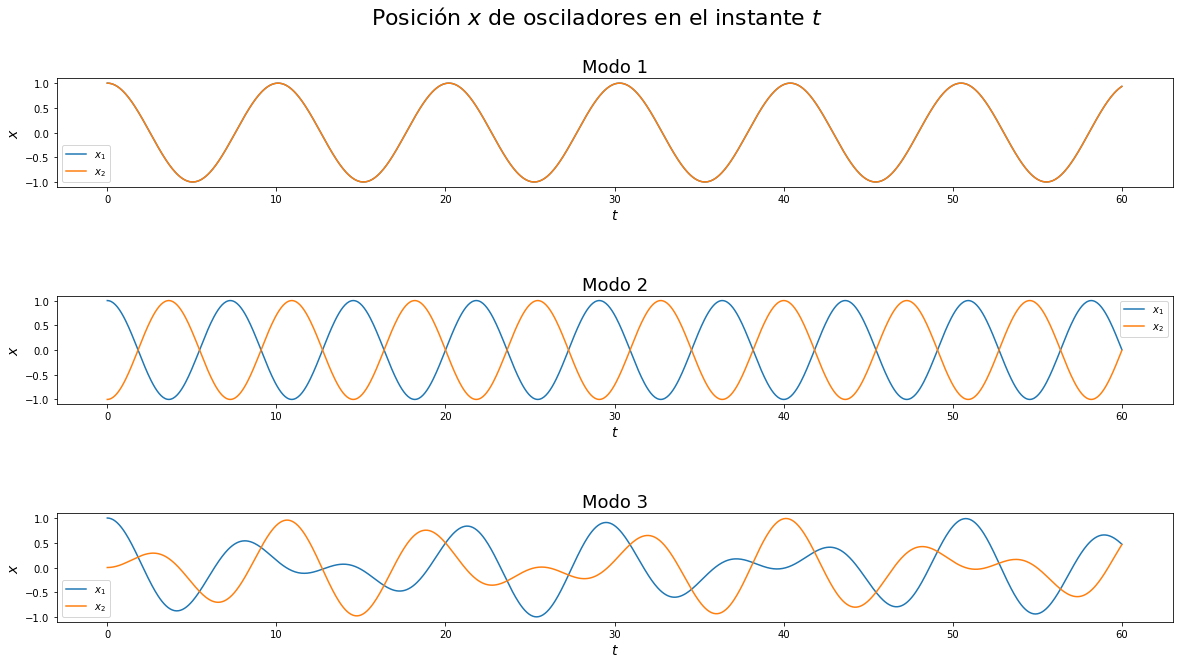

In [33]:
# Gráficas de la posición xi respecto al tiempo t de cada oscilador y para cada modo.

plt.figure(figsize=(20, 10))
plt.suptitle('Posición $x$ de osciladores en el instante $t$', size=22)
plt.subplots_adjust(hspace=1)

# Modo 1
plt.subplot(311)
plt.plot(t, x1[0], label='$x_{1}$')
plt.plot(t, x2[0], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 1', size=18)
plt.legend()

# Modo 2
plt.subplot(312)
plt.plot(t, x1[1], label='$x_{1}$')
plt.plot(t, x2[1], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 2', size=18)
plt.legend()

# Modo 3
plt.subplot(313)
plt.plot(t, x1[2], label='$x_{1}$')
plt.plot(t, x2[2], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 3', size=18)
plt.legend()

plt.show()

## **COMPROBACIÓN ANALÍTICA**

En las siguientes celdas, simplemente se aplican las ecuaciones encontradas analíticamente.

In [34]:
# Determinación de ηi analítica para los osciladores i.

η1_analytic = []
η2_analytic = []

for i in range(len(x1_0)):
    η1_analytic.append(2**-0.5 * (x1_0[i] - x2_0[i]) * np.cos(ω1*t))
    η2_analytic.append(2**-0.5 * (x1_0[i] + x2_0[i]) * np.cos(ω2*t))

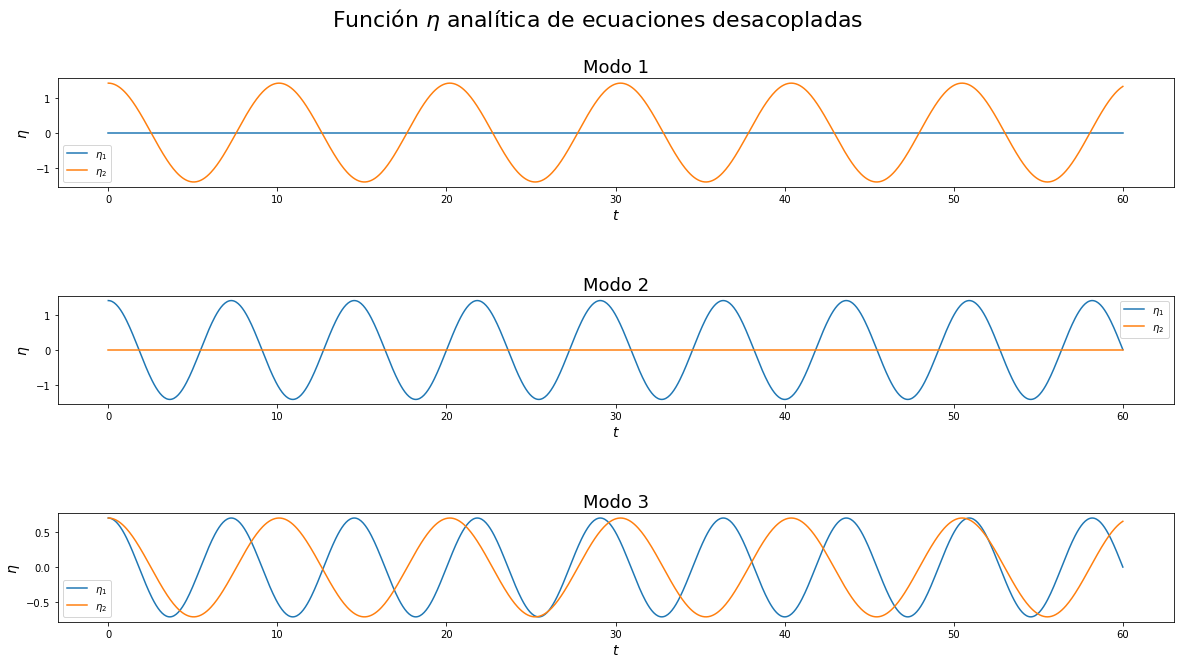

In [35]:
# Gráficas de las soluciones analíticas de ecuaciones desacopladas para cada modo.

plt.figure(figsize=(20, 10))
plt.suptitle('Función $η$ analítica de ecuaciones desacopladas', size=22)
plt.subplots_adjust(hspace=1)

# Modo 1
plt.subplot(311)
plt.plot(t, η1_analytic[0], label='$η_{1}$')
plt.plot(t, η2_analytic[0], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 1', size=18)
plt.legend()

# Modo 2
plt.subplot(312)
plt.plot(t, η1_analytic[1], label='$η_{1}$')
plt.plot(t, η2_analytic[1], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 2', size=18)
plt.legend()

# Modo 3
plt.subplot(313)
plt.plot(t, η1_analytic[2], label='$η_{1}$')
plt.plot(t, η2_analytic[2], label='$η_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$η$', size=14)
plt.title('Modo 3', size=18)
plt.legend()

plt.show()

In [36]:
# Posición xi analítica de cada oscilador i en el tiempo t.

x1_analytic = []
x2_analytic = []

for i in range(len(x1_0)):
    x1_analytic.append(2**-0.5 * (η1_analytic[i] + η2_analytic[i]))
    x2_analytic.append(2**-0.5 * (η2_analytic[i] - η1_analytic[i]))

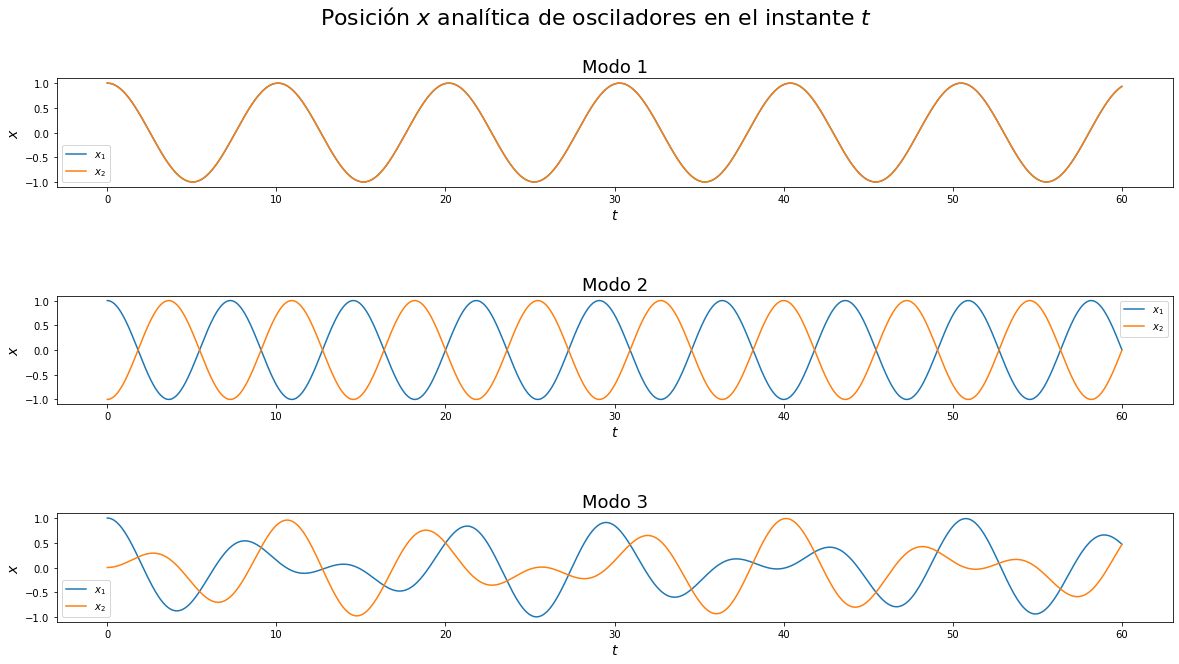

In [37]:
# Gráficas de la posición xi analítica respecto al tiempo t de cada oscilador y para cada modo.

plt.figure(figsize=(20, 10))
plt.suptitle('Posición $x$ analítica de osciladores en el instante $t$', size=22)
plt.subplots_adjust(hspace=1)

# Modo 1
plt.subplot(311)
plt.plot(t, x1_analytic[0], label='$x_{1}$')
plt.plot(t, x2_analytic[0], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 1', size=18)
plt.legend()

# Modo 2
plt.subplot(312)
plt.plot(t, x1_analytic[1], label='$x_{1}$')
plt.plot(t, x2_analytic[1], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 2', size=18)
plt.legend()

# Modo 3
plt.subplot(313)
plt.plot(t, x1_analytic[2], label='$x_{1}$')
plt.plot(t, x2_analytic[2], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 3', size=18)
plt.legend()

plt.show()

In [38]:
# Posición xi analítica (ecuación directa) de cada oscilador i en el tiempo t.

x1_direct = []
x2_direct = []

for i in range(len(x1_0)):
    x1_direct.append(0.5*(x1_0[i] - x2_0[i])*np.cos(ω1*t) + 0.5*(x1_0[i] + x2_0[i])*np.cos(ω2*t))
    x2_direct.append(0.5*(x2_0[i] - x1_0[i])*np.cos(ω1*t) + 0.5*(x1_0[i] + x2_0[i])*np.cos(ω2*t))

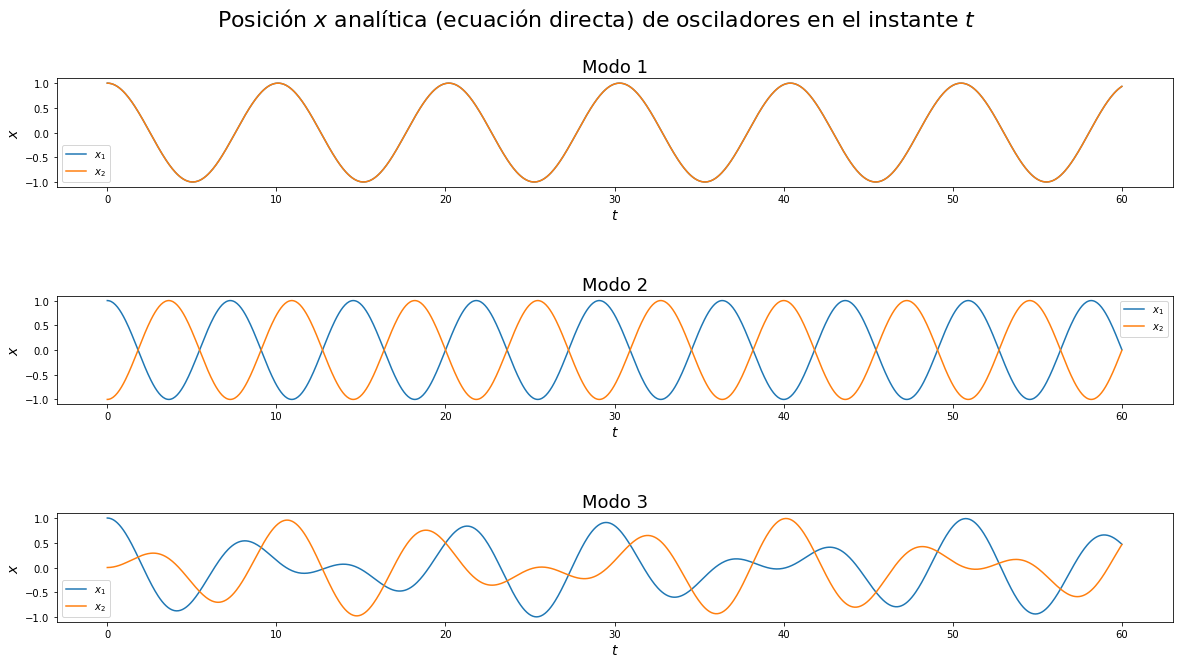

In [39]:
# Gráficas de la posición xi analítica (ecuación directa) respecto al tiempo t de cada oscilador y para cada modo.

plt.figure(figsize=(20, 10))
plt.suptitle('Posición $x$ analítica (ecuación directa) de osciladores en el instante $t$', size=22)
plt.subplots_adjust(hspace=1)

# Modo 1
plt.subplot(311)
plt.plot(t, x1_direct[0], label='$x_{1}$')
plt.plot(t, x2_direct[0], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 1', size=18)
plt.legend()

# Modo 2
plt.subplot(312)
plt.plot(t, x1_direct[1], label='$x_{1}$')
plt.plot(t, x2_direct[1], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 2', size=18)
plt.legend()

# Modo 3
plt.subplot(313)
plt.plot(t, x1_direct[2], label='$x_{1}$')
plt.plot(t, x2_direct[2], label='$x_{2}$')
plt.xlabel('$t$', size=14)
plt.ylabel('$x$', size=14)
plt.title('Modo 3', size=18)
plt.legend()

plt.show()


### **CONCLUSIONES** ###

Para un acoplamiento débil ($k_{2} <<< k$), las frecuencias de ambos osciladores se modulan y se alternan. Las oscilaciones son rápidas y sus amplitudes varían de forma senoidal y lenta.

Cuando los osciladores parten con igual deformación de los resortes (modo simétrico), estos se comportan como un único oscilador simple.

Cuando los osciladores parten con deformaciones inversas de los resortes (modo antisimétrico), estos presentan frecuencias y amplitudes iguales, pero con un desfase de 180°.

En el tercer modo las amplitudes varían de forma senoidal.

Al aumentar la masa disminuye la frecuencia.

El uso de arrays de numpy evita el uso excesivo de loops y se convierte en una herramienta muy completa para el trabajo con matrices.
